In [7]:
import numpy as np
import recombination as rb

# the running time of the notebook could be quite long (however less than 1 hour). 
# it is suggested to try with a sample value of 10 to experiment.

sample = 100

In [16]:
# comment/uncomment if you want to try the symmetric/non symmeric case

######################## SYMMETRIC
n = np.linspace(2,70,13)
n = np.append(n,[85,100])
###################################

#################### NON SYMMETRIC
# n = np.linspace(2,40,10)
###################################

n = n.astype(int)
N = [100,1000,10000,1000000]

print(n)
print(N)

t = np.zeros([len(n), len(N), sample])
ERR = np.zeros([len(n), len(N), sample])
iterations = np.zeros([len(n), len(N), sample])
eliminated_points = np.zeros([len(n), len(N), sample])

[  2   7  13  19  24  30  36  41  47  53  58  64  70  85 100]
[100, 1000, 10000, 1000000]


In [17]:
# comment/uncomment if you want to try the symmetric/non symmeric case

for i in range(len(n)):
    for j in range(len(N)):
        if N[j]<2*n[i]:
            continue

        print('n =', n[i],', N =', N[j])

        for k in range(sample):

            print('sample number =', k)
            
############# SYMMETRIC
            X = np.random.normal(0.,1., (N[j],n[i]))
###################################
    
############# NON SYMMETRIC
#             X = np.random.exponential(1., (N[j],int(n[i]/2)))
#             X = np.append(X,np.random.exponential(5., (N[j],int(n[i]/2))),axis=1)
###################################
            
            w_star, _, _, t[i,j,k], ERR[i,j,k], _, _ = rb.recomb_log(X,n[i]**3)
            
            print(all(w_star>0) and np.round(np.sum(w_star),6)==1)


n = 2 , N = 100
sample number = 0
True
sample number = 1
True
sample number = 2
True
sample number = 3
True
sample number = 4
True
sample number = 5
True
sample number = 6
True
sample number = 7
True
sample number = 8
True
sample number = 9
True
sample number = 10
True
sample number = 11
True
sample number = 12
True
sample number = 13
True
sample number = 14
True
sample number = 15
True
sample number = 16
True
sample number = 17
True
sample number = 18
True
sample number = 19
True
sample number = 20
True
sample number = 21
True
sample number = 22
True
sample number = 23
True
sample number = 24
True
sample number = 25
True
sample number = 26
True
sample number = 27
True
sample number = 28
True
sample number = 29
True
sample number = 30
True
sample number = 31
True
sample number = 32
True
sample number = 33
True
sample number = 34
True
sample number = 35
True
sample number = 36
True
sample number = 37
True
sample number = 38
True
sample number = 39
True
sample number = 40
True
sample num

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:370: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)


True
sample number = 82
True
sample number = 83
True
sample number = 84
True
sample number = 85
True
sample number = 86
True
sample number = 87
True
sample number = 88
True
sample number = 89
True
sample number = 90
True
sample number = 91
True
sample number = 92
True
sample number = 93
True
sample number = 94
True
sample number = 95
True
sample number = 96
True
sample number = 97
True
sample number = 98
True
sample number = 99
True
n = 2 , N = 10000
sample number = 0
True
sample number = 1
True
sample number = 2
True
sample number = 3
True
sample number = 4
True
sample number = 5
True
sample number = 6
True
sample number = 7
True
sample number = 8
True
sample number = 9
True
sample number = 10
True
sample number = 11
True
sample number = 12
True
sample number = 13
True
sample number = 14
True
sample number = 15
True
sample number = 16
True
sample number = 17
True
sample number = 18
True
sample number = 19
True
sample number = 20
True
sample number = 21
True
sample number = 22
True
sam

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:395: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


True
sample number = 49
True
sample number = 50
True
sample number = 51
True
sample number = 52
True
sample number = 53
True
sample number = 54
True
sample number = 55
True
sample number = 56
True
sample number = 57
True
sample number = 58
True
sample number = 59
True
sample number = 60
True
sample number = 61
True
sample number = 62
True
sample number = 63
True
sample number = 64
True
sample number = 65
True
sample number = 66
True
sample number = 67
True
sample number = 68
True
sample number = 69
True
sample number = 70
True
sample number = 71
True
sample number = 72
True
sample number = 73
True
sample number = 74
True
sample number = 75
True
sample number = 76
True
sample number = 77
True
sample number = 78
True
sample number = 79
True
sample number = 80
True
sample number = 81
True
sample number = 82
True
sample number = 83
True
sample number = 84
True
sample number = 85
True
sample number = 86
True
sample number = 87
True
sample number = 88
True
sample number = 89
True
sample numb

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


True
sample number = 39
True
sample number = 40
True
sample number = 41
True
sample number = 42
True
sample number = 43
True
sample number = 44
True
sample number = 45
True
sample number = 46
True
sample number = 47
True
sample number = 48
True
sample number = 49
True
sample number = 50
True
sample number = 51
True
sample number = 52
True
sample number = 53
True
sample number = 54
True
sample number = 55
True
sample number = 56
True
sample number = 57
True
sample number = 58
True
sample number = 59
True
sample number = 60
True
sample number = 61
True
sample number = 62
True
sample number = 63
True
sample number = 64
True
sample number = 65
True
sample number = 66
True
sample number = 67
True
sample number = 68
True
sample number = 69
True
sample number = 70
True
sample number = 71
True
sample number = 72
True
sample number = 73
True
sample number = 74
True
sample number = 75
True
sample number = 76
True
sample number = 77
True
sample number = 78
True
sample number = 79
True
sample numb

In [18]:
# if max_err is not 0 it means there have been problems.
# ERR* = 2 means no solution found (using the assigne value of maximum iteration)
# although for the considered cases we have not experienced this situation, it could happen for the basic algo if max_iter is low
# ERR* = 3 means the weights do not sum up to 1 or they are not between 0 or 1
# caused by numerical error
# for the other errors read recombination.py

print("ERROR =", np.max(ERR))
print("mean t = ", np.mean(t,axis=2))

ERROR = 0.0
mean t =  [[5.85970990e-04 9.26740170e-04 1.04690237e-03 5.17941499e-02]
 [8.17295070e-04 1.19321768e-03 1.68293989e-03 8.28641670e-02]
 [2.05353159e-03 1.65350085e-03 3.78957871e-03 1.20138810e-01]
 [3.90515535e-03 4.69509501e-03 1.02813617e-02 2.58180845e-01]
 [6.01777052e-03 8.11460204e-03 1.74411242e-02 3.19963992e-01]
 [8.88024976e-03 1.06920934e-02 2.62228365e-02 3.96807439e-01]
 [2.12169144e-02 1.59312071e-02 4.09967058e-02 4.84499746e-01]
 [4.63907097e-02 1.79213768e-02 5.16006437e-02 5.46596461e-01]
 [9.77198530e-02 2.27350372e-02 7.42828355e-02 6.42158223e-01]
 [0.00000000e+00 3.01791852e-02 1.00169185e-01 7.93963371e-01]
 [0.00000000e+00 3.63261262e-02 1.33815357e-01 8.66917775e-01]
 [0.00000000e+00 4.42039398e-02 1.99580044e-01 9.77044137e-01]
 [0.00000000e+00 5.75645100e-02 2.27131412e-01 1.14831876e+00]
 [0.00000000e+00 1.35149254e-01 4.38054588e-01 1.58621127e+00]
 [0.00000000e+00 3.15527215e-01 7.93699033e-01 2.24773584e+00]]


In [19]:
import copy

n_copy = copy.copy(n)
t_copy = copy.copy(t)
iter_copy = copy.copy(iterations)

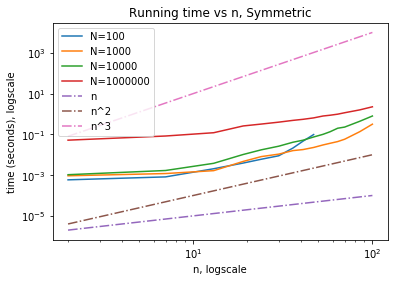

In [22]:
from matplotlib import pyplot as plt

x = n_copy
y = np.mean(t_copy,axis=2).T
error = np.std(t_copy,axis=2).T

idx = y>0
plt.plot(x[idx[0]], y[0,idx[0]], '-', label="N=%d"%(N[0]))
plt.plot(x[idx[1]], y[1,idx[1]], '-', label="N=%d"%(N[1]))
plt.plot(x[idx[3]], y[2,idx[2]], '-', label="N=%d"%(N[2]))
plt.plot(x[idx[3]], y[3,idx[3]].T, '-', label="N=%d"%(N[3]))

plt.plot(n, 0.000001*n,'-.', label = "n")
plt.plot(n, 0.000001*n**2,'-.', label = "n^2")
plt.plot(n, 0.01*n**3,'-.', label = "n^3")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Running time vs n, Symmetric')
plt.xlabel('n, logscale')
plt.ylabel('time (seconds), logscale')
# plt.savefig('study_vs_n_time_100sample.pdf', bbox_inches='tight')
plt.show()